In [17]:
import pandas as pd
import seaborn as sns
from matplotlib import dates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.ndimage import gaussian_filter1d
import re

In [38]:
#implementation from https://www.toptal.com/python/topic-modeling-python
#using LDA to create topic models from the wall descriptions

# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfTransformer
# from sklearn.decomposition import LatentDirichletAllocation as LDA
# from nltk.corpus import stopwords

In [39]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [40]:
dataset = pd.read_csv('1VyIL3EA62oNab4whc59KOntE8nvYQsBN_alt_FILES/Scotland EPC Dataset.csv')

In [41]:
#inspecting the dataset
dataset.head()

,Property_UPRN,Postcode,POST_TOWN,Date of Assessment,Primary Energy Indicator (kWh/m²/year),Total floor area (m²),Current energy efficiency rating,Current energy efficiency rating band,Potential Energy Efficiency Rating,Potential energy efficiency rating band,Current Environmental Impact Rating,Current Environmental Impact Rating Band,Potential Environmental Impact Rating,Potential Environmental Impact Rating Band,CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr),WALL_DESCRIPTION,WALL_ENERGY_EFF,ROOF_DESCRIPTION,ROOF_ENERGY_EFF,FLOOR_DESCRIPTION,FLOOR_ENERGY_EFF,FLOOR_ENV_EFF,WINDOWS_DESCRIPTION,WINDOWS_ENERGY_EFF,WINDOWS_ENV_EFF,MAINHEAT_DESCRIPTION,MAINHEAT_ENERGY_EFF,MAINHEAT_ENV_EFF,MAINHEATCONT_DESCRIPTION,MAINHEATC_ENERGY_EFF,MAINHEATC_ENV_EFF,HOT_WATER_ENERGY_EFF,HOT_WATER_ENV_EFF,LIGHTING_DESCRIPTION,LIGHTING_ENERGY_EFF,LIGHTING_ENV_EFF,Current Emissions (T.CO2/yr),Potential Reduction in Emissions (T.CO2/yr),Total current energy costs over 3 years (£),Current heating costs over 3 years (£),Potential heating costs over 3 years (£),Current hot water costs over 3 years (£),Potential hot water costs over 3 years (£),Current lighting costs over 3 years (£),Potential lighting costs over 3 years (£),Part 1 Construction Age Band,Built Form,Property Type
0,1.001101e+09,EH4 5EZ,EDINBURGH,01/01/2021,375.0,94.0,53.0,E,85.0,B,45.0,E,82.0,B,66.0,"Cavity wall, as built, no insulation (assumed)",Poor,"Pitched, 25 mm loft insulation",Poor,"Suspended, no insulation (assumed)",N/A,N/A,Description: Fully double glazed,Average,Average,"Boiler and radiators, mains gas",Good,Good,"Programmer, room thermostat and TRVs",Good,Good,Poor,Poor,Low energy lighting in all fixed outlets,Very Good,Very Good,6.2,4.2,3789.0,2922.0,1548.0,645.0,219.0,222.0,222.0,1930-1949,Semi-Detached,House
1,1.001951e+09,EH7 4HE,EDINBURGH,01/01/2021,250.0,175.0,66.0,D,80.0,C,57.0,D,75.0,C,44.0,"Cavity wall, filled cavity",Average,"Pitched, insulated (assumed) | Roof room(s), i...",Average | Good | Very Poor,"Suspended, no insulation (assumed)",N/A,N/A,Description: Fully double glazed,Average,Average,"Boiler and radiators, mains gas",Good,Good,"Programmer, room thermostat and TRVs",Good,Good,Good,Good,Low energy lighting in all fixed outlets,Very Good,Very Good,7.7,2.8,4635.0,4068.0,3015.0,246.0,246.0,321.0,321.0,1919-1929,End-Terrace,House
2,1.000996e+09,EH4 2DL,EDINBURGH,02/01/2021,403.0,72.0,61.0,D,78.0,C,48.0,E,64.0,D,68.0,"Cavity wall, as built, partial insulation (ass...",Average | Average,(another dwelling above),N/A,(another dwelling below),N/A,N/A,Description: Single glazed,Very Poor,Very Poor,Electric storage heaters,Average,Very Poor,Manual charge control,Poor,Poor,Very Poor,Poor,Low energy lighting in 50% of fixed outlets,Good,Good,4.9,1.6,3570.0,2226.0,1191.0,1038.0,564.0,306.0,207.0,1965-1975,Semi-Detached,Flat
3,1.001257e+09,PH1 1SA,PERTH,02/01/2021,174.0,96.0,76.0,C,87.0,B,75.0,C,85.0,B,31.0,"Cavity wall, as built, insulated (assumed)",Good,"Pitched, 250 mm loft insulation",Good,"Suspended, insulated (assumed)",N/A,N/A,Description: Fully double glazed,Average,Average,"Boiler and radiators, mains gas",Good,Good,"Programmer, room thermostat and TRVs",Good,Good,Good,Good,Low energy lighting in all fixed outlets,Very Good,Very Good,2.9,0.9,2049.0,1554.0,1554.0,258.0,177.0,237.0,237.0,1999-2002,Mid-Terrace,House
4,1.235709e+09,G78 1QN,Glasgow,02/01/2021,145.0,58.0,79.0,C,79.0,C,82.0,B,82.0,B,26.0,"Sandstone or limestone, with internal insulati...",Good | Good,"Pitched, 200 mm loft insulation",Good,(another dwelling below),N/A,N/A,Description: Fully double glazed,Good,Good,"Boiler and radiators, mains gas",Good,Good,"Programmer, room thermostat and TRVs",Good,Good,Good,Good,Low energy lighting in 90% of fixed outlets,Very Good,Very Good,1.5,0.0,1212.0,828.0,828.0,216.0,216.0,168.0,168.0,before 1919,Mid-Terrace,Flat


In [6]:
dataset.columns

Index(['Property_UPRN', 'Postcode', 'POST_TOWN', 'Date of Assessment',
       'Primary Energy Indicator (kWh/m²/year)', 'Total floor area (m²)',
       'Current energy efficiency rating',
       'Current energy efficiency rating band',
       'Potential Energy Efficiency Rating',
       'Potential energy efficiency rating band',
       'Current Environmental Impact Rating',
       'Current Environmental Impact Rating Band',
       'Potential Environmental Impact Rating',
       'Potential Environmental Impact Rating Band',
       'CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr)',
       'WALL_DESCRIPTION', 'WALL_ENERGY_EFF', 'ROOF_DESCRIPTION',
       'ROOF_ENERGY_EFF', 'FLOOR_DESCRIPTION', 'FLOOR_ENERGY_EFF',
       'FLOOR_ENV_EFF', 'WINDOWS_DESCRIPTION', 'WINDOWS_ENERGY_EFF',
       'WINDOWS_ENV_EFF', 'MAINHEAT_DESCRIPTION', 'MAINHEAT_ENERGY_EFF',
       'MAINHEAT_ENV_EFF', 'MAINHEATCONT_DESCRIPTION', 'MAINHEATC_ENERGY_EFF',
       'MAINHEATC_ENV_EFF', 'HOT_WATER_ENERGY_EFF', 'HO

In [7]:
town_efficiency = dataset.groupby(['POST_TOWN'])['Current energy efficiency rating'].mean()

In [8]:
#noticing that the same town can appear multiple times
town_efficiency

POST_TOWN
ABERDEEN                   68.413096
ABERDEEN                   82.000000
ABERDEENSHIRE              83.250000
ABERFELDY                  63.464567
ABERLOUR                   62.445122
ABERLOUR                   84.000000
ABERNETHY                  89.000000
ABOYNE                     65.759259
ACHARACLE                  57.066667
ACHNASHEEN                 52.564103
AIRDRIE                    69.688797
ALEXANDRIA                 68.915663
ALFORD                     58.980392
ALLOA                      69.676402
ALNESS                     72.175258
ALVA                       67.712821
ANNAN                      64.026525
ANSTRUTHER                 63.022388
APPIN                      57.260870
ARBROATH                   68.480203
ARDERSIER                  84.071429
ARDGAY                     55.800000
ARDROSSAN                  67.381215
ARGYLL                     74.000000
ARGYLL AND BUTE            87.375000
ARISAIG                    57.583333
ARROCHAR                   5

In [9]:
dataset['POST_TOWN'] = dataset.POST_TOWN.astype(str).str.lower().str.strip()

In [10]:
len(dataset.POST_TOWN.unique())

666

In [11]:
dataset['POST_TOWN'] = dataset['POST_TOWN'].str.replace('edingburgh','edinburgh')

In [12]:
len(dataset.POST_TOWN.unique())

665

In [13]:
dataset.isnull().sum()

Property_UPRN                                               0
Postcode                                                    0
POST_TOWN                                                   0
Date of Assessment                                          0
Primary Energy Indicator (kWh/m²/year)                      0
Total floor area (m²)                                       0
Current energy efficiency rating                            0
Current energy efficiency rating band                       0
Potential Energy Efficiency Rating                          0
Potential energy efficiency rating band                     0
Current Environmental Impact Rating                         0
Current Environmental Impact Rating Band                    0
Potential Environmental Impact Rating                       0
Potential Environmental Impact Rating Band                  0
CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr)         0
WALL_DESCRIPTION                                            0
WALL_ENE

In [14]:
town_efficiency = dataset.groupby(['POST_TOWN'])['Current energy efficiency rating'].mean()

In [15]:
dataset['POST_TOWN'] = dataset['POST_TOWN'].str.rstrip()

In [16]:
len(dataset.POST_TOWN.unique())

665

# Part 1: Rankings

## 1 Rank Towns by Current Energy Efficiency Rating

In [20]:

town_efficiency = dataset.groupby(['POST_TOWN'])['Current energy efficiency rating'].mean().reset_index(name='Mean')
town_efficiency = town_efficiency.sort_values(by='Mean', ascending=False ).reset_index(drop=True)
town_efficiency.head(5)

,POST_TOWN,Mean
0,gartocharn,115.000000
1,bannockburn,111.750000
2,gatehouse of fleet,101.000000
3,north lanarkshire,97.117647
4,south aryshire,96.000000


## 2 Rank Towns by potential energy efficiency rating

In [21]:

town_potential_eff = dataset.groupby(['POST_TOWN'])['Potential Energy Efficiency Rating'].mean().reset_index(name='Mean')
town_potential_eff=  town_potential_eff.sort_values(by='Mean', ascending=False).reset_index(drop=True)
town_potential_eff.head(5)

,POST_TOWN,Mean
0,gatehouse of fleet,128.0
1,comrie,123.0
2,sanday,119.0
3,crainlarich,118.5
4,gartocharn,118.0


## 3 Rank Towns by current environmental impact rating 

In [22]:
town_curr_env_impact = dataset.groupby(['POST_TOWN'])['Current Environmental Impact Rating'].mean().reset_index(name='Mean')
town_curr_env_impact = town_curr_env_impact.sort_values(by='Mean', ascending=False).reset_index(drop=True)
town_curr_env_impact.head(5)

,POST_TOWN,Mean
0,gartocharn,113.000000
1,bannockburn,109.750000
2,north lanarkshire,98.705882
3,south aryshire,97.000000
4,ardfern,96.000000


## 3 Periods where houses were relatively more or less environmentally friendly than average

In [23]:


town_env_date = dataset.groupby(['POST_TOWN', 'Date of Assessment' ])['Current Environmental Impact Rating'].mean().reset_index(name='Mean')
town_env_date.head()

,POST_TOWN,Date of Assessment,Mean
0,aberdeen,01/02/2021,64.818182
1,aberdeen,01/03/2021,70.153846
2,aberdeen,01/04/2021,69.333333
3,aberdeen,01/06/2021,72.755556
4,aberdeen,01/07/2021,68.844444


In [24]:
town_periods = town_env_date.merge(town_curr_env_impact, left_on='POST_TOWN', right_on='POST_TOWN')
town_periods.head()


,POST_TOWN,Date of Assessment,Mean_x,Mean_y
0,aberdeen,01/02/2021,64.818182,68.005636
1,aberdeen,01/03/2021,70.153846,68.005636
2,aberdeen,01/04/2021,69.333333,68.005636
3,aberdeen,01/06/2021,72.755556,68.005636
4,aberdeen,01/07/2021,68.844444,68.005636


In [25]:
# more friendly

town_periods['isMoreEnvFriendly'] =  town_periods['Mean_x'] < town_periods['Mean_y']
# town_periods_more

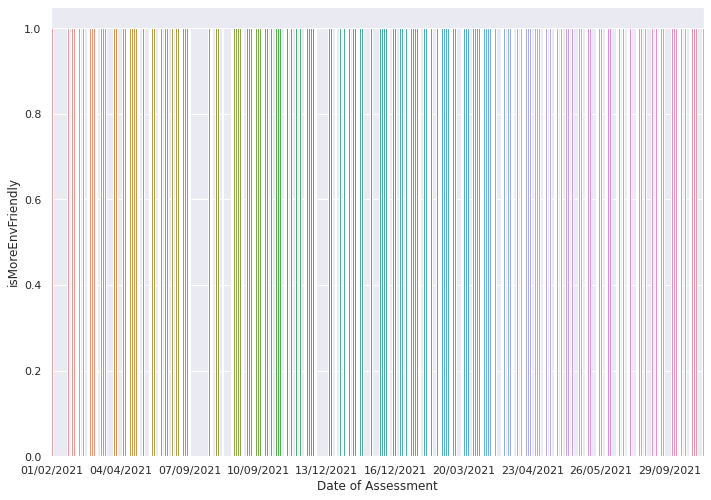

In [28]:
start_date = 0
end_date = 5000
interval = 1
chosen_town = 'aberdeen'
to_viz = town_periods[town_periods['POST_TOWN']  == chosen_town].loc[start_date:end_date: interval]
# print(to_viz.head(30))
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(data=to_viz, x='Date of Assessment', y='isMoreEnvFriendly')
# ax.set_xticks(range(len(to_viz) // 5))  #, labels=range(2011, 2019)
ax.xaxis.set_major_locator(ticker.MultipleLocator(31))
# ax.xaxis.set_major_formatter(dates.DateFormatter("%d"))

In [30]:
# less friendly

town_periods_more =  town_periods[town_periods['Mean_x'] > town_periods['Mean_y']]
town_periods_more.head()

,POST_TOWN,Date of Assessment,Mean_x,Mean_y,isMoreEnvFriendly
1,aberdeen,01/03/2021,70.153846,68.005636,False
2,aberdeen,01/04/2021,69.333333,68.005636,False
3,aberdeen,01/06/2021,72.755556,68.005636,False
4,aberdeen,01/07/2021,68.844444,68.005636,False
5,aberdeen,01/09/2021,69.595238,68.005636,False


In [31]:
town_env_date['Date of Assessment'] = pd.to_datetime(town_env_date['Date of Assessment'], format='%d/%m/%Y')

In [32]:
gartocharn = town_env_date[town_env_date['POST_TOWN']=='gartocharn']
gartocharn

,POST_TOWN,Date of Assessment,Mean
15324,gartocharn,2021-05-26,113.0


In [33]:
bannockburn = town_env_date[town_env_date['POST_TOWN']=='bannockburn']
bannockburn

,POST_TOWN,Date of Assessment,Mean
3803,bannockburn,2021-06-28,109.75


In [34]:
gatehouse_of_fleet = town_env_date[town_env_date['POST_TOWN']=='gatehouse of fleet']
gatehouse_of_fleet

,POST_TOWN,Date of Assessment,Mean
15348,gatehouse of fleet,2021-08-19,83.0


In [35]:
north_lanarkshire = town_env_date[town_env_date['POST_TOWN']=='north lanarkshire']
north_lanarkshire

,POST_TOWN,Date of Assessment,Mean
28915,north lanarkshire,2021-11-11,99.1875
28916,north lanarkshire,2021-03-25,91.0000


In [36]:
south_aryshire = town_env_date[town_env_date['POST_TOWN']=='south aryshire']
south_aryshire

,POST_TOWN,Date of Assessment,Mean
32811,south aryshire,2021-08-04,97.0


In [37]:
ardfern = town_env_date[town_env_date['POST_TOWN']=='ardfern']
ardfern

,POST_TOWN,Date of Assessment,Mean
2354,ardfern,2021-12-14,96.0


In [38]:
measurements = dataset.groupby(['POST_TOWN'])['POST_TOWN'].count().reset_index(name='count')

In [41]:
measurements = measurements.sort_values(by='count', ascending=False).reset_index(drop=True)
measurements.head()

,POST_TOWN,count
0,glasgow,37529
1,edinburgh,19276
2,aberdeen,9226
3,dundee,5782
4,paisley,3136


In [43]:
glasgow = town_env_date[town_env_date['POST_TOWN']=='glasgow']
glasgow

,POST_TOWN,Date of Assessment,Mean
15486,glasgow,2021-02-01,67.567164
15487,glasgow,2021-03-01,68.902256
15488,glasgow,2021-04-01,66.358779
15489,glasgow,2021-05-01,73.200000
15490,glasgow,2021-06-01,70.469613
15491,glasgow,2021-07-01,71.487654
15492,glasgow,2021-08-01,68.750000
15493,glasgow,2021-09-01,69.426357
15494,glasgow,2021-10-01,69.291339
15495,glasgow,2021-11-01,65.218543


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


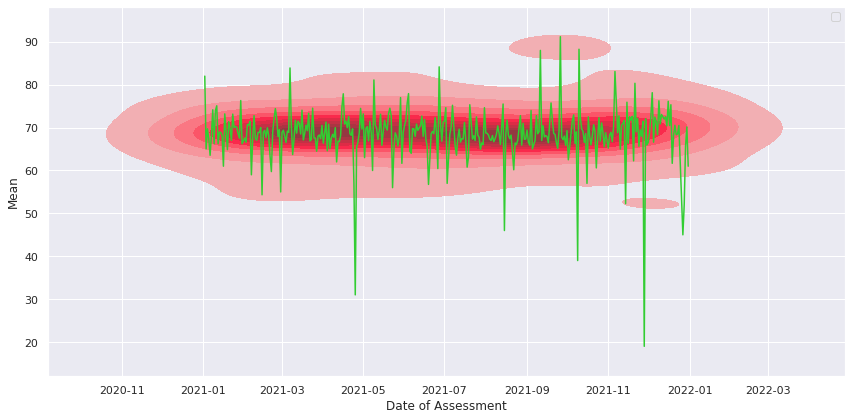

In [44]:
#Glasglow does not really show a trend.
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(data=glasgow,
            color='crimson', x='Date of Assessment', y='Mean', fill=True, ax=ax)
sns.lineplot(data=glasgow,x='Date of Assessment', y='Mean', color='limegreen')
ax.legend()
plt.tight_layout()
plt.show()

/tmp/ipykernel_690483/1656999309.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  glasgow['smooth_mean'] = Final_array_smooth
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


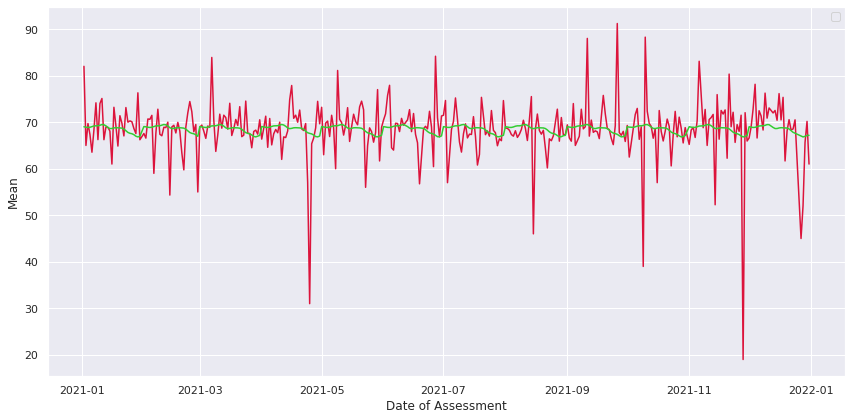

In [45]:
#Glasglow does not really show a trend.
fig, ax = plt.subplots(figsize=(12, 6))

Final_array_smooth = gaussian_filter1d(glasgow['Mean'].to_numpy(), sigma=20) #sigma helps differentiate "periods"
glasgow['smooth_mean'] = Final_array_smooth
sns.lineplot(data=glasgow,x='Date of Assessment', y='Mean', color='crimson')
sns.lineplot(data=glasgow,x='Date of Assessment', y='smooth_mean', color='limegreen')
ax.legend()
plt.tight_layout()
plt.show()
# Smoothing

In [98]:
edinburgh = town_env_date[town_env_date['POST_TOWN']=='edinburgh']
edinburgh

,POST_TOWN,Date of Assessment,Mean
12489,edinburgh,2021-01-01,51.000000
12490,edinburgh,2021-02-01,70.355932
12491,edinburgh,2021-03-01,72.357143
12492,edinburgh,2021-04-01,73.457447
12493,edinburgh,2021-05-01,59.800000
...,...,...,...
12829,edinburgh,2021-05-31,70.320000
12830,edinburgh,2021-07-31,84.666667
12831,edinburgh,2021-08-31,72.105882
12832,edinburgh,2021-10-31,94.000000


<AxesSubplot: xlabel='Date of Assessment'>

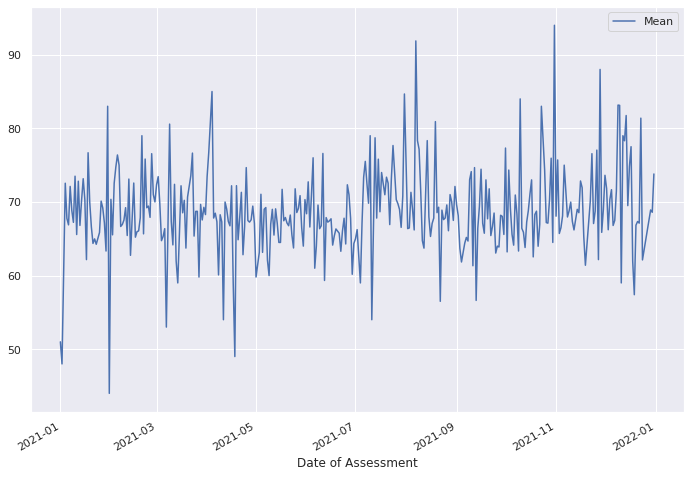

In [99]:
#Edinburgh seems to show larger impact at the end of the year
edinburgh.plot(x='Date of Assessment', y='Mean')

In [100]:
aberdeen = town_env_date[town_env_date['POST_TOWN']=='aberdeen']
aberdeen

,POST_TOWN,Date of Assessment,Mean
0,aberdeen,2021-02-01,64.818182
1,aberdeen,2021-03-01,70.153846
2,aberdeen,2021-04-01,69.333333
3,aberdeen,2021-06-01,72.755556
4,aberdeen,2021-07-01,68.844444
...,...,...,...
290,aberdeen,2021-11-30,64.500000
291,aberdeen,2021-12-30,56.000000
292,aberdeen,2021-03-31,71.645161
293,aberdeen,2021-05-31,69.794118


<AxesSubplot: xlabel='Date of Assessment'>

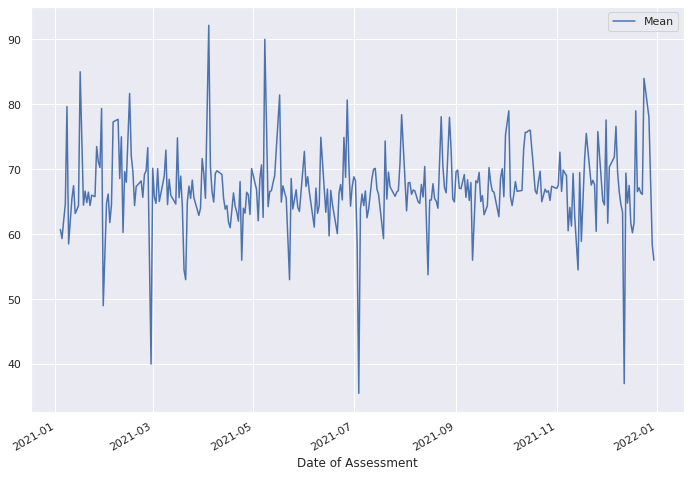

In [101]:
#There does not seem to be a pattern for Aberdeen.
aberdeen.plot(x='Date of Assessment', y='Mean')

## 4 Rank Towns by potential environmental impact rating 'Potential Environmental Impact Rating'    

In [111]:


town_pot_env = dataset.groupby(['POST_TOWN'])['Potential Environmental Impact Rating'].mean().reset_index(name='Mean')
town_pot_env = town_pot_env.sort_values(by='Mean', ascending=False).reset_index(drop=True)
town_pot_env.head()

,POST_TOWN,Mean
0,west plean,126.0
1,meigle,122.0
2,comrie,121.0
3,gartocharn,117.0
4,sanday,117.0


## 5 Rank Towns by Current Emissions (T.CO2/yr)

In [112]:


town_curr_em = dataset.groupby(['POST_TOWN'])['Current Emissions (T.CO2/yr)'].mean().reset_index(name='Mean')
town_curr_em = town_pot_env.sort_values(by='Mean', ascending=False).reset_index(drop=True)
town_curr_em.head()

,POST_TOWN,Mean
0,west plean,126.0
1,meigle,122.0
2,comrie,121.0
3,sanday,117.0
4,gartocharn,117.0


## 6 Rank Towns by Potential Reduction in Emissions (T.CO2/yr) 

In [114]:
town_pot_red_em = dataset.groupby(['POST_TOWN'])['Potential Reduction in Emissions (T.CO2/yr)'].mean().reset_index(name='Mean')
town_pot_red_em = town_pot_env.sort_values(by='Mean', ascending=False).reset_index(drop=True)
town_pot_red_em.head()

,POST_TOWN,Mean
0,west plean,126.0
1,meigle,122.0
2,comrie,121.0
3,sanday,117.0
4,gartocharn,117.0


## 7 Rank Towns by potential savings in heating costs (£) over three years

In [115]:

dataset['heat_savings'] = dataset['Current heating costs over 3 years (£)'] - dataset['Potential heating costs over 3 years (£)']

In [116]:
town_save_heating = dataset.groupby(['POST_TOWN'])['heat_savings'].mean().reset_index(name='Mean')
town_save_heating = town_save_heating.sort_values(by='Mean', ascending=False).reset_index(drop=True)
town_save_heating.head()

,POST_TOWN,Mean
0,bonawe,11085.0
1,east dunbartonshire,11016.0
2,morvern,7098.0
3,corsock,6639.0
4,findhorn,5922.0


## 8 Rank Towns by potential savings in hot water costs (£) over three years 

In [118]:
dataset['hot_water_save'] = dataset['Current hot water costs over 3 years (£)'] - dataset['Potential hot water costs over 3 years (£)']
town_hot_water_save = dataset.groupby(['POST_TOWN'])['hot_water_save'].mean().reset_index(name='Mean')
town_hot_water_save = town_hot_water_save.sort_values(by='Mean', ascending=False).reset_index(drop=True)
town_hot_water_save.head()

,POST_TOWN,Mean
0,kincardine,2283.0
1,east dunbartonshire,1653.0
2,by maybole,1080.0
3,corsock,1056.0
4,burghead,978.0


## 9 Rank the top 5 wall descriptions (wall materials) by CO2 emissions current per floor area and wall energy efficiency 
## (create a single rating combining CO2 emissions and wall energy efficiency) 

In [46]:
# Including assumed descriptions, experimented with and without and there wasn't much difference
def clean_string(a: str)-> str:
    return a.replace('(assumed)','').strip().replace('Â','')

In [47]:
energy_and_emission = []
DELIMITER = "|"
for idx, row in dataset.iterrows():
    if DELIMITER not in row.WALL_ENERGY_EFF:
        energy_and_emission.append((clean_string(row.WALL_DESCRIPTION), clean_string(row.WALL_ENERGY_EFF), row["CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr)"]))
        continue
    wall_desc = row.WALL_DESCRIPTION.split(DELIMITER)
    wall_eff = row.WALL_ENERGY_EFF.split(DELIMITER)
    for i in range(len(wall_desc)):
        energy_and_emission.append((clean_string(wall_desc[i]),clean_string(wall_eff[i]),row["CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr)"]))
  

In [48]:
energy_and_emission[:50]  

[('Cavity wall, as built, no insulation', 'Poor', 66.0),
 ('Cavity wall, filled cavity', 'Average', 44.0),
 ('Cavity wall, as built, partial insulation', 'Average', 68.0),
 ('Cavity wall, filled cavity', 'Average', 68.0),
 ('Cavity wall, as built, insulated', 'Good', 31.0),
 ('Sandstone or limestone, with internal insulation', 'Good', 26.0),
 ('Solid brick, with internal insulation', 'Good', 26.0),
 ('Cavity wall, filled cavity', 'Good', 84.0),
 ('Cavity wall, filled cavity', 'Average', 42.0),
 ('System built, with external insulation', 'Good', 36.0),
 ('Cavity wall, as built, no insulation', 'Poor', 55.0),
 ('Granite or whinstone, with internal insulation', 'Good', 55.0),
 ('Timber frame, as built, insulated', 'Good', 23.0),
 ('Cavity wall, as built, insulated', 'Very Good', 23.0),
 ('Sandstone or limestone, as built, no insulation', 'Poor', 59.0),
 ('System built, as built, no insulation', 'Poor', 59.0),
 ('Cavity wall, as built, insulated', 'Good', 48.0),
 ('Cavity wall, filled cavi

In [49]:
ee_df = pd.DataFrame(energy_and_emission, columns=["description", "rating","CO2"])

In [50]:

ee_df['description'] = ee_df['description'].str.strip()

In [51]:
# Convert ratings to a number from 1 to 5
ee_df['rating'] = ee_df['rating'].str.strip()
ee_df['rating'].value_counts()

Poor         70120
Good         65563
Average      48141
Very Good    42792
Very Poor    13413
Name: rating, dtype: int64

In [52]:
rating_map = {
    'Very Poor': 1,
    'Poor': 2,
    'Average': 3,
    'Good': 4,
    'Very Good': 5,
}
just_rating = ee_df[['rating']]
ee_df['rating'] = just_rating.applymap(lambda s: rating_map.get(s) if s in rating_map else s)['rating']

In [53]:
ee_df.head()

,description,rating,CO2
0,"Cavity wall, as built, no insulation",2,66.0
1,"Cavity wall, filled cavity",3,44.0
2,"Cavity wall, as built, partial insulation",3,68.0
3,"Cavity wall, filled cavity",3,68.0
4,"Cavity wall, as built, insulated",4,31.0


In [54]:
# Min Max Noramlise CO2
CO2_col = ee_df['CO2']
# ee_df['CO2_norm'] = (CO2_col - CO2_col.mean())/CO2_col.std()
ee_df['CO2_norm'] = (CO2_col - CO2_col.min())/(CO2_col.max()-CO2_col.min()) * 5.

In [55]:
# My combined metric would be out of 10, out of 5 for rating and out of 5 for CO2 for equal weightage
ee_df['combi'] = ee_df['rating'] + ee_df['CO2_norm']

In [56]:
wall_desc_ee = ee_df.groupby(['description'])['combi'].mean().reset_index(name='Mean')
wall_desc_ee = wall_desc_ee.sort_values(by='Mean', ascending=True).reset_index(drop=True)
wall_desc_ee

,description,Mean
0,Average thermal transmittance 1.70 W/m²K,2.223118
1,Average thermal transmittance 1.80 W/m²K,2.350806
2,Average thermal transmittance 1.63 W/m²K,2.424731
3,"System built, as built, no insulation",2.696194
4,"Timber frame, as built, no insulation",3.029699
5,Average thermal transmittance 1.06 W/m²K,3.213038
6,Average thermal transmittance 1.55 W/m²K,3.223118
7,Average thermal transmittance 1.40 W/m²K,3.256720
8,Average thermal transmittance 1.51 W/m²K,3.266801
9,Average thermal transmittance 1.31 W/m²K,3.280242


## 10 Rank the top 5 roof descriptions by CO2 emissions current per floor area and wall energy efficiency 
## (create a single rating combining CO2 emissions and wall energy efficiency)

In [159]:
dataset.columns

Index(['Property_UPRN', 'Postcode', 'POST_TOWN', 'Date of Assessment',
       'Primary Energy Indicator (kWh/m²/year)', 'Total floor area (m²)',
       'Current energy efficiency rating',
       'Current energy efficiency rating band',
       'Potential Energy Efficiency Rating',
       'Potential energy efficiency rating band',
       'Current Environmental Impact Rating',
       'Current Environmental Impact Rating Band',
       'Potential Environmental Impact Rating',
       'Potential Environmental Impact Rating Band',
       'CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr)',
       'WALL_DESCRIPTION', 'WALL_ENERGY_EFF', 'ROOF_DESCRIPTION',
       'ROOF_ENERGY_EFF', 'FLOOR_DESCRIPTION', 'FLOOR_ENERGY_EFF',
       'FLOOR_ENV_EFF', 'WINDOWS_DESCRIPTION', 'WINDOWS_ENERGY_EFF',
       'WINDOWS_ENV_EFF', 'MAINHEAT_DESCRIPTION', 'MAINHEAT_ENERGY_EFF',
       'MAINHEAT_ENV_EFF', 'MAINHEATCONT_DESCRIPTION', 'MAINHEATC_ENERGY_EFF',
       'MAINHEATC_ENV_EFF', 'HOT_WATER_ENERGY_EFF', 'HO

In [191]:
r_dataset = dataset.dropna(subset=["ROOF_ENERGY_EFF"])
r_dataset["ROOF_DESCRIPTION"] = r_dataset["ROOF_DESCRIPTION"].str.strip()
r_dataset["ROOF_ENERGY_EFF"] = r_dataset["ROOF_ENERGY_EFF"].str.strip()
# r_dataset = r_dataset[r_dataset["ROOF_ENERGY_EFF"].str.contains("N/A") == False]

/tmp/ipykernel_624370/3450782831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_dataset["ROOF_DESCRIPTION"] = r_dataset["ROOF_DESCRIPTION"].str.strip()
/tmp/ipykernel_624370/3450782831.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_dataset["ROOF_ENERGY_EFF"] = r_dataset["ROOF_ENERGY_EFF"].str.strip()


In [192]:
r_dataset.ROOF_ENERGY_EFF.value_counts()

Good                                 51723
Very Good                            33936
N/A                                  11929
Very Poor                             9991
Average                               9120
Good | Good                           4940
Poor                                  3070
Very Poor | Very Poor                 2522
Good | Very Poor                      2024
Average | Good                        1460
Very Poor | Good                      1314
Very Good | Good                      1222
Good | Very Good                       928
Very Poor | Poor                       892
Good | Poor                            878
Average | Very Poor                    787
Good | Average                         705
Poor | Good                            474
Very Good | Very Poor                  448
N/A | Very Poor                        429
Very Poor | Very Good                  380
Very Poor | Average                    375
Good | Good | Good                     362
Poor | Very

In [358]:
r_energy_and_emission = []
DELIMITER = "|"
for idx, row in r_dataset.iterrows():
#     print(row)
#     print(row.ROOF_ENERGY_EFF)
    if DELIMITER not in row.ROOF_ENERGY_EFF:
        if('N/A' in row.ROOF_ENERGY_EFF):
            continue
        energy_and_emission.append((clean_string(row.ROOF_DESCRIPTION), clean_string(row.ROOF_ENERGY_EFF), row["CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr)"]))
        
        continue
    r_desc = row.ROOF_DESCRIPTION.split(DELIMITER)
    r_eff = row.ROOF_ENERGY_EFF.split(DELIMITER)
    for i in range(len(r_desc)):
        if ('N/A' in r_eff[i]):
            continue
        r_energy_and_emission.append((clean_string(r_desc[i]),clean_string(r_eff[i]),row["CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr)"]))
  

In [363]:
ree_df.head(10)

,description,rating,CO2,CO2_norm,combi
0,"Pitched, insulated",3,44.0,0.698198,3.698198
1,"Roof room(s), insulated",4,44.0,0.698198,4.698198
2,"Roof room(s), no insulation",1,44.0,0.698198,1.698198
3,"Pitched, 270 mm loft insulation",4,42.0,0.675676,4.675676
4,"Roof room(s), insulated",4,42.0,0.675676,4.675676
5,"Pitched, 200 mm loft insulation",4,55.0,0.822072,4.822072
6,"Pitched, 250 mm loft insulation",4,55.0,0.822072,4.822072
7,"Pitched, no insulation",1,58.0,0.855856,1.855856
8,"Roof room(s), ceiling insulated",2,58.0,0.855856,2.855856
9,"Pitched, 250 mm loft insulation",4,62.0,0.900901,4.900901


In [364]:
ree_df.description.value_counts()

Roof room(s), insulated                 6829
Pitched, no insulation                  6341
Pitched, insulated                      6185
Roof room(s), no insulation             4447
Pitched, 200 mm loft insulation         3761
Roof room(s), ceiling insulated         3378
Pitched, 300 mm loft insulation         3136
Pitched, 150 mm loft insulation         2807
Pitched, 250 mm loft insulation         2737
Flat, insulated                         2345
Pitched, 100 mm loft insulation         2219
Flat, limited insulation                2197
Pitched, 270 mm loft insulation         1875
Pitched, limited insulation             1858
Flat, no insulation                     1396
Roof room(s), limited insulation        1007
Pitched, 50 mm loft insulation           443
Pitched, insulated at rafters            413
Pitched, 350 mm loft insulation          313
Pitched, 75 mm loft insulation           299
Pitched, 400+ mm loft insulation         252
Pitched, 25 mm loft insulation            91
Pitched, 4

In [365]:
ree_df = pd.DataFrame(r_energy_and_emission, columns=["description", "rating","CO2"])
# Convert ratings to a number from 1 to 5
ree_df['description'] = ree_df['description'].str.strip()
ree_df['rating'] = ree_df['rating'].str.strip()
ree_df['rating'].value_counts()
just_rating = ree_df[['rating']]
ree_df['rating'] = just_rating.applymap(lambda s: rating_map.get(s) if s in rating_map else s)['rating']
# Min Max Noramlise CO2
CO2_col = ree_df['CO2']
ree_df['CO2_norm'] = (CO2_col - CO2_col.min())/(CO2_col.max()-CO2_col.min()) * 5.
ree_df['combi'] = ree_df['rating'] + ree_df['CO2_norm']
r_desc_ee = ree_df.groupby(['description'])['combi'].mean().reset_index(name='Mean')
r_desc_ee = r_desc_ee.sort_values(by='Mean', ascending=True).reset_index(drop=True)
r_desc_ee

,description,Mean
0,"Pitched, no insulation",2.029174
1,"Flat, no insulation",2.043901
2,"Pitched, 12 mm loft insulation",2.051051
3,"Roof room(s), no insulation",2.125227
4,"Pitched, limited insulation",2.221802
5,"Flat, limited insulation",2.399630
6,"Pitched, 0 mm loft insulation",2.469970
7,"Pitched, 50 mm loft insulation",2.966181
8,"Pitched, 25 mm loft insulation",3.002995
9,"Roof room(s), ceiling insulated",3.302337


# Part 2: Algorithm Challenges

## Algorithm Challenge 1: Build and algorithm to find correlations between CO2 emissions current per floor area vs wall description and wall energy efficiency

In [57]:
ee_df['description'].value_counts()

Cavity wall, filled cavity                              35798
Timber frame, as built, insulated                       30881
Sandstone or limestone, as built, no insulation         28429
Cavity wall, as built, no insulation                    20338
Solid brick, as built, no insulation                    19220
Cavity wall, as built, insulated                        16636
Cavity wall, as built, partial insulation                8486
Solid brick, as built, partial insulation                7508
Granite or whinstone, as built, no insulation            7111
System built, with external insulation                   7053
System built, as built, no insulation                    6187
Average thermal transmittance 0.22 W/m²K                 6060
Solid brick, as built, insulated                         5853
Cavity wall, with external insulation                    5303
Average thermal transmittance 0.21 W/m²K                 4255
Average thermal transmittance 0.17 W/m²K                 3339
System b

In [58]:
len(ee_df['description'].unique())

120

### Wall description can be classified as 2 kinds of data

1. Categorical like Cavity wall, as build, no insulation
2. Continuous like Average thermal transmittance 0.22 W/m²K

We'll start with continuous data first

In [59]:
just_test = dataset[dataset['WALL_DESCRIPTION'].str.contains('thermal transmittance')]

In [60]:
# This shows wall descriptions with thermal transmittance values isn't a mix of wall descriptions
just_test.WALL_DESCRIPTION.value_counts()

Average thermal transmittance 0.22 W/m²K      4659
Average thermal transmittance 0.21 W/m²K      3223
Average thermal transmittance 0.17 W/m²K      2477
Average thermal transmittance 0.16 W/m²K      1590
Average thermal transmittance 0.22 W/m²K      1284
Average thermal transmittance 0.18 W/m²K      1101
Average thermal transmittance 0.21 W/m²K      1016
Average thermal transmittance 0.15 W/m²K       960
Average thermal transmittance 0.19 W/m²K       908
Average thermal transmittance 0.20 W/m²K       868
Average thermal transmittance 0.17 W/m²K       825
Average thermal transmittance 0.16 W/m²K       464
Average thermal transmittance 0.14 W/m²K       435
Average thermal transmittance 0.18 W/m²K       329
Average thermal transmittance 0.19 W/m²K       300
Average thermal transmittance 0.20 W/m²K       206
Average thermal transmittance 0.13 W/m²K       177
Average thermal transmittance 0.23 W/m²K       176
Average thermal transmittance 0.15 W/m²K       153
Average thermal transmittance 0

In [61]:
# def get_thermal_transmittance(x):
#     description = x['description']
#     nums = re.findall(r'\d+',description)
#     print(nums)
#     return nums[0] if len(nums) > 0 else 0

In [62]:
thermal_df = ee_df[ee_df['description'].str.contains('thermal transmittance')]

In [63]:
# thermal_df['val'] = thermal_df.apply(get_thermal_transmittance, axis=1)
thermal_df['thermal_val'] = thermal_df['description'].str.extract(r'(\d+.\d+)').astype('float')

/tmp/ipykernel_690483/3705620401.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thermal_df['thermal_val'] = thermal_df['description'].str.extract(r'(\d+.\d+)').astype('float')


In [64]:
thermal_df.head(10)

,description,rating,CO2,CO2_norm,combi,thermal_val
121,Average thermal transmittance 0.20 W/m²K,5,17.0,1.182796,6.182796,0.20
122,Average thermal transmittance 0.21 W/m²K,5,12.0,1.149194,6.149194,0.21
123,Average thermal transmittance 0.22 W/m²K,5,12.0,1.149194,6.149194,0.22
124,Average thermal transmittance 0.21 W/m²K,5,11.0,1.142473,6.142473,0.21
125,Average thermal transmittance 0.21 W/m²K,5,13.0,1.155914,6.155914,0.21
126,Average thermal transmittance 0.25 W/m²K,5,8.0,1.122312,6.122312,0.25
127,Average thermal transmittance 0.25 W/m²K,5,8.0,1.122312,6.122312,0.25
131,Average thermal transmittance 0.25 W/m²K,5,8.0,1.122312,6.122312,0.25
132,Average thermal transmittance 0.25 W/m²K,5,8.0,1.122312,6.122312,0.25
133,Average thermal transmittance 0.22 W/m²K,5,6.0,1.108871,6.108871,0.22


<AxesSubplot: xlabel='thermal_val', ylabel='CO2'>

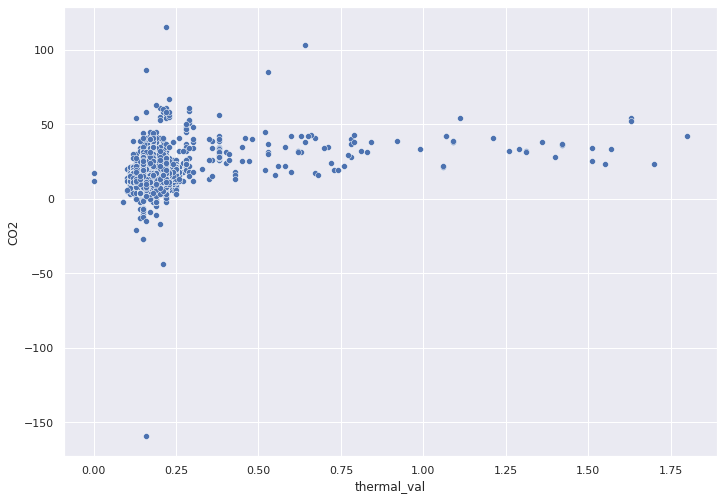

In [65]:
sns.scatterplot(data=thermal_df, x='thermal_val',y='CO2')

### Generally there doesn't seem to be a correlation between thermal transmittance and CO2 emissions. 

Let's take a look wrt their energy rating

In [350]:
desired_rating = 2
filtered_thermal_df = thermal_df[thermal_df['rating'] == desired_rating]
filtered_thermal_df.head()

,description,rating,CO2,CO2_norm,combi,thermal_val
10258,Average thermal transmittance 1.09 W/m²K,2,38.0,1.323925,3.323925,1.09
10268,Average thermal transmittance 1.09 W/m²K,2,39.0,1.330645,3.330645,1.09
10269,Average thermal transmittance 1.09 W/m²K,2,38.0,1.323925,3.323925,1.09
10303,Average thermal transmittance 1.09 W/m²K,2,39.0,1.330645,3.330645,1.09
71333,Average thermal transmittance 1.51 W/m²K,2,25.0,1.236559,3.236559,1.51


In [351]:
# Number of each rating
print(len(filtered_thermal_df))

24


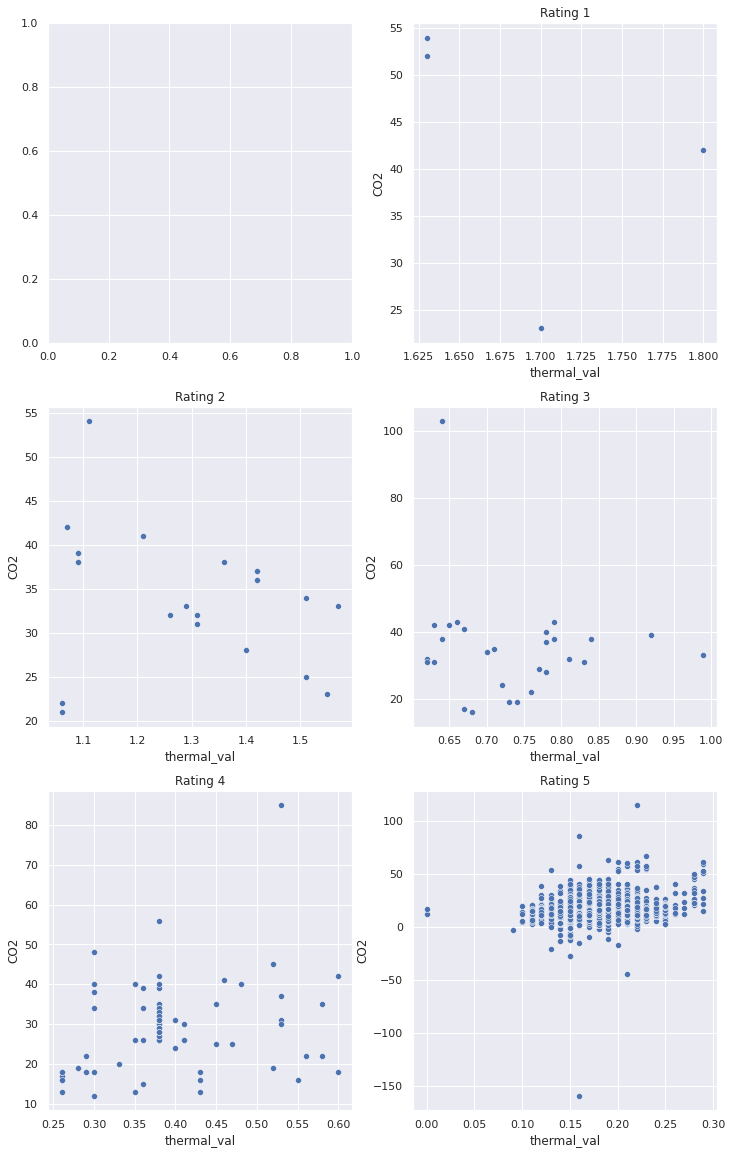

In [352]:
fig, ax = plt.subplots(3, 2)
fig.set_size_inches(12, 20)
for i in range(1,6):
    desired_rating = i
    filtered_thermal_df = thermal_df[thermal_df['rating'] == desired_rating]
    ax[i // 2, i % 2].set_title(f'Rating {desired_rating}')
#     ax[i // 2, i % 2].plot(filtered_thermal_df['thermal_val'],filtered_thermal_df['CO2'])
    sns.scatterplot(ax=ax[i // 2, i % 2], data=filtered_thermal_df, x='thermal_val',y='CO2')


## Again there isn't any correlation between thermal transmittance and CO2 emissions wrt their energy ratings. 

#### However, we can at least observe that thermal transmittance is lower as energy ratings are better rated.

Let's now investigate if wall descriptions of same categorical value are clustered together in terms of C02 emissions 

In [353]:
import math

In [354]:
others_df = ee_df[ee_df['description'].str.contains('thermal transmittance') == False]

In [355]:
unique_descriptions = others_df['description'].unique()

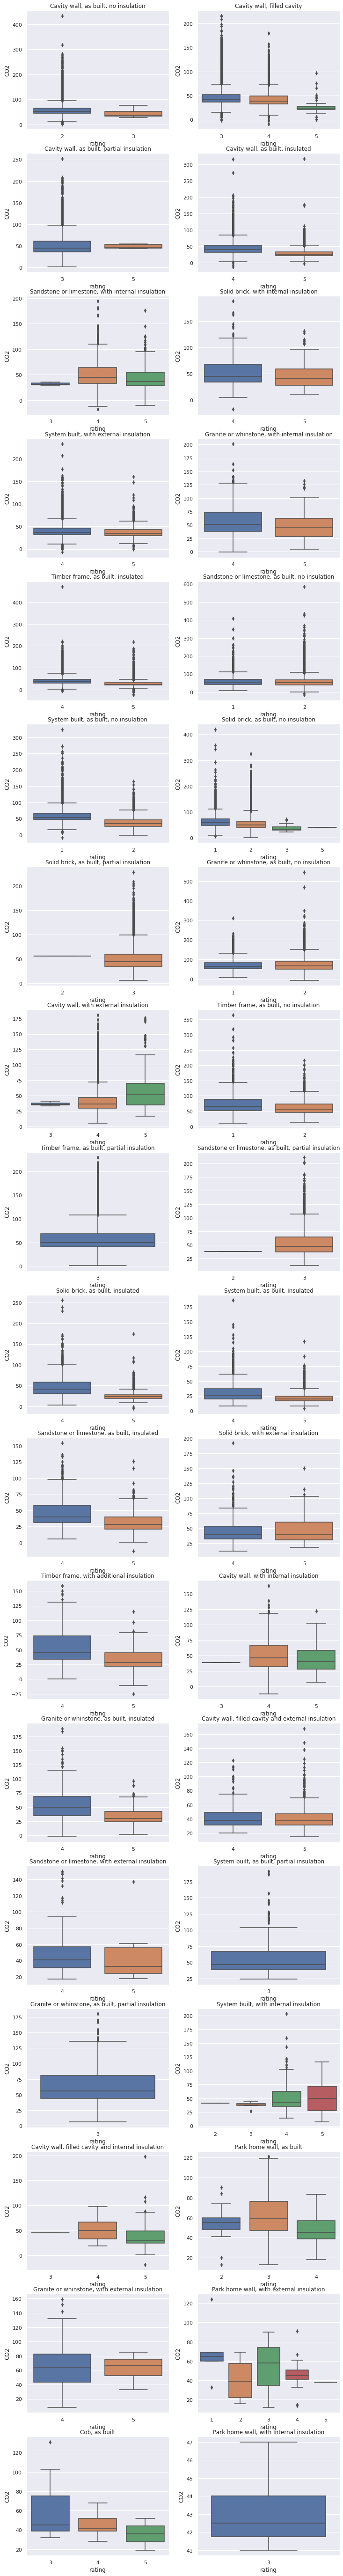

In [356]:
fig, ax = plt.subplots(math.ceil(len(unique_descriptions) / 2), 2)
fig.set_size_inches(12, 100)
for i in range(len(unique_description_df)):
    cur = unique_descriptions[i]
    filtered_others_df = others_df[others_df['description'] == cur]
    ax[i // 2, i % 2].set_title(f'{cur}')
    sns.boxplot(ax=ax[i // 2, i % 2], data=filtered_others_df, x='rating',y='CO2')

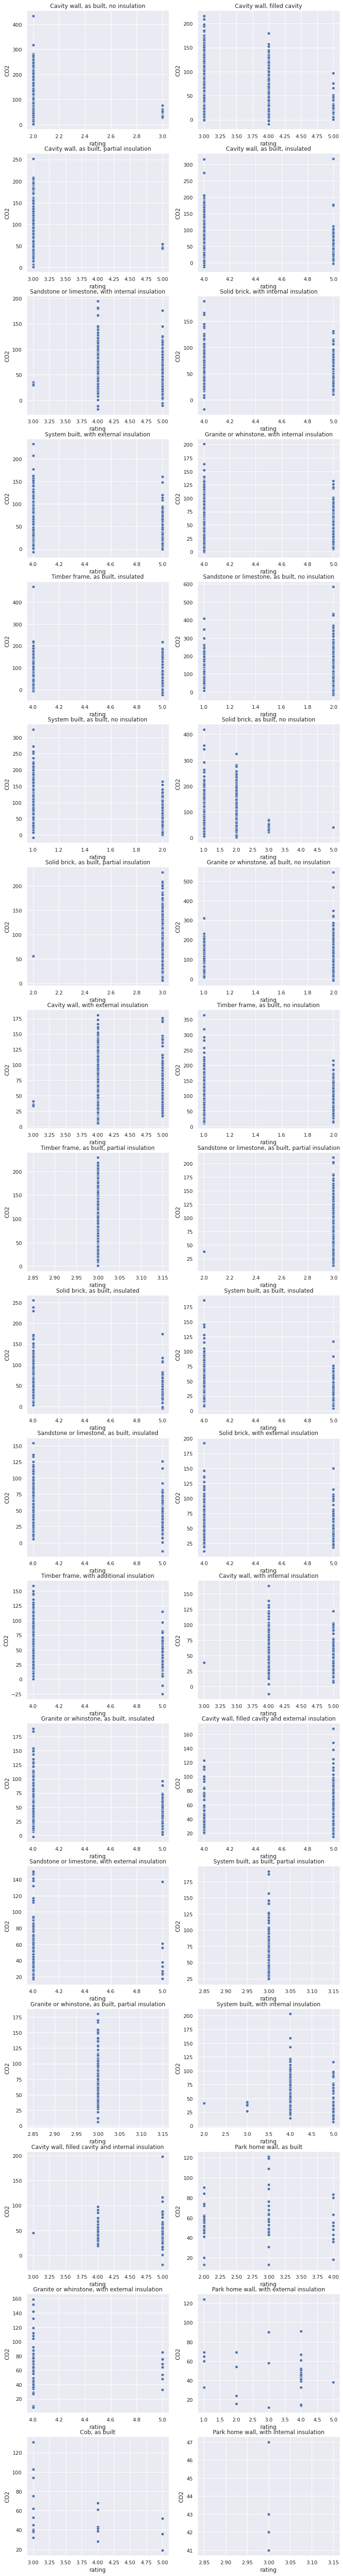

In [357]:
fig, ax = plt.subplots(math.ceil(len(unique_descriptions) / 2), 2)
fig.set_size_inches(12, 100)
for i in range(len(unique_description_df)):
    cur = unique_descriptions[i]
    filtered_others_df = others_df[others_df['description'] == cur]
    ax[i // 2, i % 2].set_title(f'{cur}')
    sns.scatterplot(ax=ax[i // 2, i % 2], data=filtered_others_df, x='rating',y='CO2')

## The above plots shows a range of CO2 values a specific category of wall descriptions can take, with some rating specific clustering, variances, rough expected min and max CO2 emission values.

## Algorithm Challenge 2: Build and algorithm to find correlations between CO2 emissions current per floor area vs roof description and roof energy efficiency

In [368]:
ree_df['description'].value_counts()
# seems like loft insulation only occurs on pitched roofs

Roof room(s), insulated                 6829
Pitched, no insulation                  6341
Pitched, insulated                      6185
Roof room(s), no insulation             4447
Pitched, 200 mm loft insulation         3761
Roof room(s), ceiling insulated         3378
Pitched, 300 mm loft insulation         3136
Pitched, 150 mm loft insulation         2807
Pitched, 250 mm loft insulation         2737
Flat, insulated                         2345
Pitched, 100 mm loft insulation         2219
Flat, limited insulation                2197
Pitched, 270 mm loft insulation         1875
Pitched, limited insulation             1858
Flat, no insulation                     1396
Roof room(s), limited insulation        1007
Pitched, 50 mm loft insulation           443
Pitched, insulated at rafters            413
Pitched, 350 mm loft insulation          313
Pitched, 75 mm loft insulation           299
Pitched, 400+ mm loft insulation         252
Pitched, 25 mm loft insulation            91
Pitched, 4

### Roof description can also be classified as 2 kinds of data

1. Categorical like Roof room(s), no insulation
2. Continuous values loft insulation e.g. 200mm

Similarly, we'll start with continuous data first

In [380]:
loft_df = ree_df[ree_df['description'].str.contains('loft insulation')]
loft_df['thickness'] = loft_df['description'].str.extract(r'(\d+)').astype('float')

/tmp/ipykernel_624370/3337928212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loft_df['thickness'] = loft_df['description'].str.extract(r'(\d+)').astype('float')


In [381]:
loft_df.thickness.value_counts()

200.0    3761
300.0    3136
150.0    2807
250.0    2737
100.0    2219
270.0    1875
50.0      443
350.0     313
75.0      299
400.0     279
25.0       91
12.0       24
0.0         6
Name: thickness, dtype: int64

<AxesSubplot: xlabel='thickness', ylabel='CO2'>

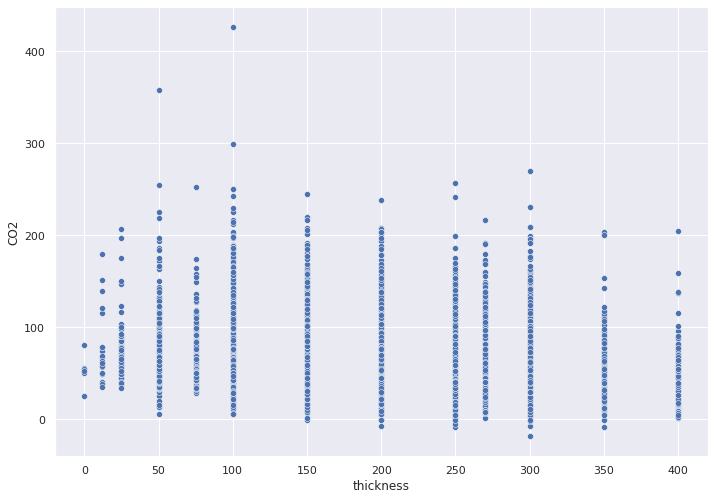

In [382]:
sns.scatterplot(data=loft_df, x='thickness',y='CO2')

<AxesSubplot: xlabel='thickness', ylabel='CO2'>

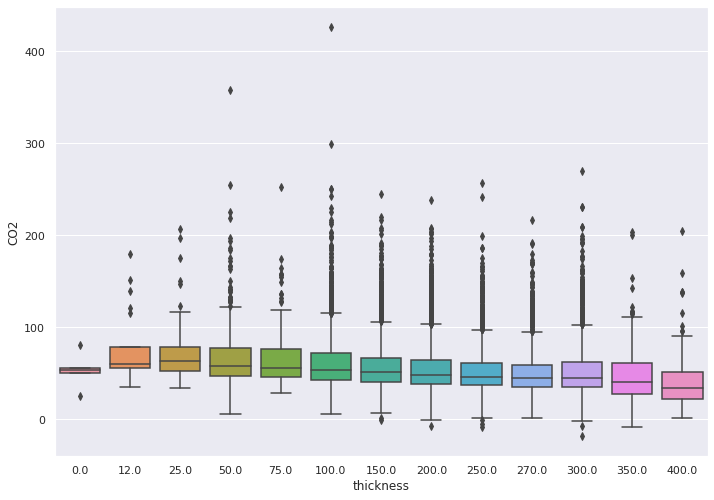

In [383]:
sns.boxplot(data=loft_df, x='thickness',y='CO2')

## Both boxplot and scatter plot shows that there's no correlation.  Now wrt to rating

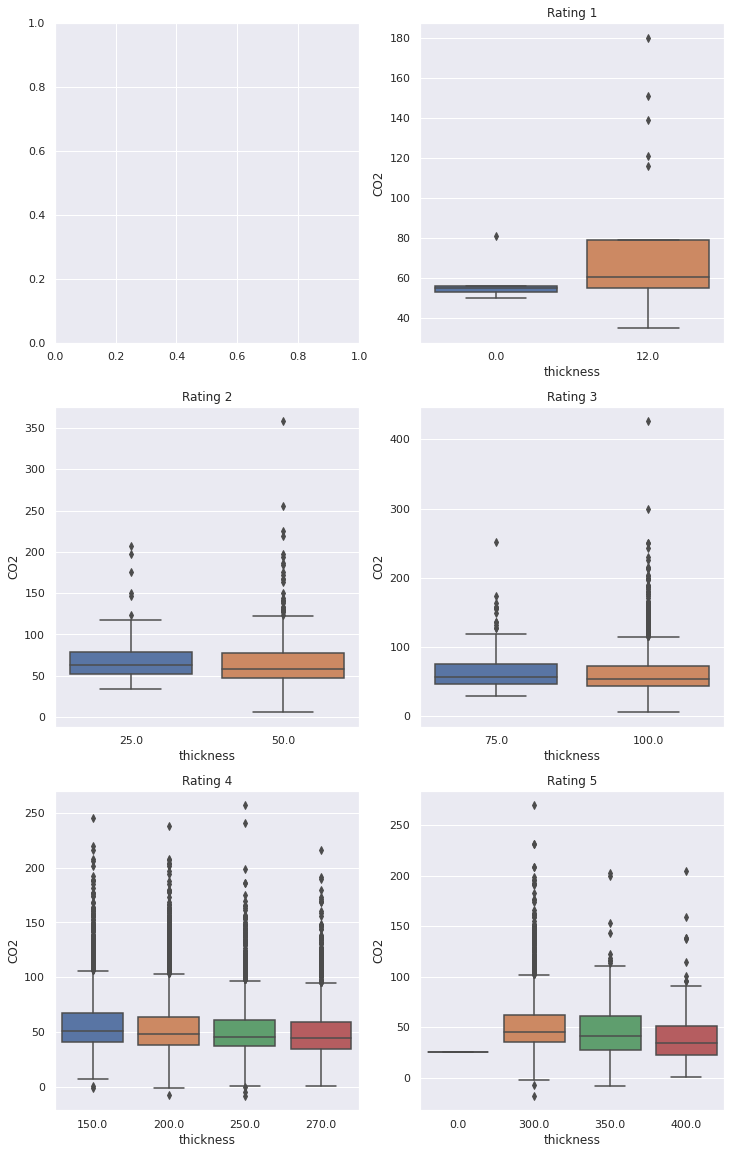

In [384]:
fig, ax = plt.subplots(3, 2)
fig.set_size_inches(12, 20)
for i in range(1,6):
    desired_rating = i
    filtered_loft_df = loft_df[loft_df['rating'] == desired_rating]
    ax[i // 2, i % 2].set_title(f'Rating {desired_rating}')
    sns.boxplot(ax=ax[i // 2, i % 2], data=filtered_loft_df, x='thickness',y='CO2')


## For most of the plots, it shows that within a rating, as thickness increases, mean CO2 decreases.

We can also see that the thickness is generally higher as the rating is higher.

In [386]:
r_others_df = ree_df[ree_df['description'].str.contains('loft insulation') == False]

In [388]:
unique_descriptions = r_others_df['description'].unique()


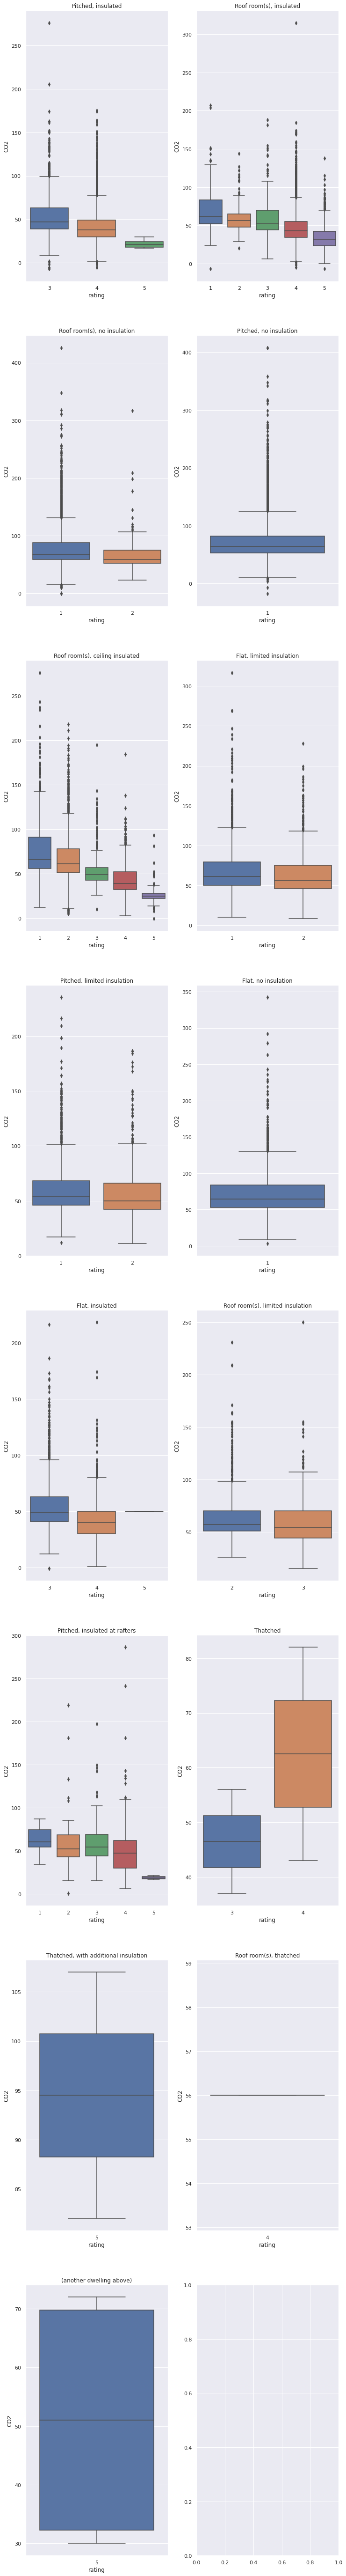

In [389]:
fig, ax = plt.subplots(math.ceil(len(unique_descriptions) / 2), 2)
fig.set_size_inches(12, 100)
for i in range(len(unique_descriptions)):
    cur = unique_descriptions[i]
    filtered_r_others_df = r_others_df[r_others_df['description'] == cur]
    ax[i // 2, i % 2].set_title(f'{cur}')
    sns.boxplot(ax=ax[i // 2, i % 2], data=filtered_r_others_df, x='rating',y='CO2')

## Also for most of the roof categories, higher rating means generally lower mean CO2 ratings

### Generally, the range of CO2 values across the categories are roughly the same besides the outliers.

## Algorithm Challenge 3: Build and algorithm to find correlations between construction age band vs current energy efficiency and current emissions (T.CO2/yr) 

The approach to this is to create a linear regression model using the age of the building and to find out the relationship between current energy efficiency and current emissions. 

In [66]:
dataset['Part 1 Construction Age Band'].value_counts()

before 1919     36103
1950-1964       27750
1965-1975       24157
1930-1949       14222
1984-1991       10235
2003-2007        9503
1976-1983        9150
1992-1998        9076
1999-2002        5891
2008 onwards     5082
1919-1929        3898
Name: Part 1 Construction Age Band, dtype: int64

In [68]:
age_of_build = dataset.groupby(['Part 1 Construction Age Band'])['Current energy efficiency rating','Current Emissions (T.CO2/yr)'].mean().reset_index()

/tmp/ipykernel_690483/1828837144.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  age_of_build = dataset.groupby(['Part 1 Construction Age Band'])['Current energy efficiency rating','Current Emissions (T.CO2/yr)'].mean().reset_index()


In [69]:
age_of_build = age_of_build.dropna(subset=['Part 1 Construction Age Band'])

In [70]:
age_of_build['Part 1 Construction Age Band'] = age_of_build['Part 1 Construction Age Band'].str.replace('2008 onwards', '2008-2022')
age_of_build['Part 1 Construction Age Band'] = age_of_build['Part 1 Construction Age Band'].str.replace('before 1919', '1850-1919')

In [71]:
age_of_build.head(20)

,Part 1 Construction Age Band,Current energy efficiency rating,Current Emissions (T.CO2/yr)
0,1919-1929,62.244228,4.805747
1,1930-1949,64.988258,4.264428
2,1950-1964,65.663387,3.973697
3,1965-1975,66.230327,4.079704
4,1976-1983,67.528634,3.858721
5,1984-1991,69.085491,3.484475
6,1992-1998,71.311040,3.473204
7,1999-2002,72.708708,3.404447
8,2003-2007,76.565927,2.898558
9,2008-2022,78.443133,2.598642


In [72]:
start_end_df = age_of_build['Part 1 Construction Age Band'].str.extract(r'((\d+)-(\d+))').dropna()

In [73]:
start_end_df

,0,1,2
0,1919-1929,1919,1929
1,1930-1949,1930,1949
2,1950-1964,1950,1964
3,1965-1975,1965,1975
4,1976-1983,1976,1983
5,1984-1991,1984,1991
6,1992-1998,1992,1998
7,1999-2002,1999,2002
8,2003-2007,2003,2007
9,2008-2022,2008,2022


In [74]:
def get_mid_year(x):
#     print(x)
    start = int(x[1])
    end = int(x[2])
    return start + (end - start) // 2

In [75]:
age_of_build_start_end = pd.merge(start_end_df, age_of_build,left_on=0, right_on='Part 1 Construction Age Band').drop(columns=[0])
age_of_build_start_end['mid_year'] = age_of_build_start_end.apply(get_mid_year,axis=1)
age_of_build_start_end = age_of_build_start_end.sort_values(by='mid_year', ascending=True).reset_index(drop=True)

In [76]:
age_of_build_start_end['est_building_age'] = 2022-age_of_build_start_end['mid_year']

In [77]:
age_of_build_start_end

,1,2,Part 1 Construction Age Band,Current energy efficiency rating,Current Emissions (T.CO2/yr),mid_year,est_building_age
0,1850,1919,1850-1919,59.158740,5.644251,1884,138
1,1919,1929,1919-1929,62.244228,4.805747,1924,98
2,1930,1949,1930-1949,64.988258,4.264428,1939,83
3,1950,1964,1950-1964,65.663387,3.973697,1957,65
4,1965,1975,1965-1975,66.230327,4.079704,1970,52
5,1976,1983,1976-1983,67.528634,3.858721,1979,43
6,1984,1991,1984-1991,69.085491,3.484475,1987,35
7,1992,1998,1992-1998,71.311040,3.473204,1995,27
8,1999,2002,1999-2002,72.708708,3.404447,2000,22
9,2003,2007,2003-2007,76.565927,2.898558,2005,17


<AxesSubplot: xlabel='est_building_age', ylabel='Current energy efficiency rating'>

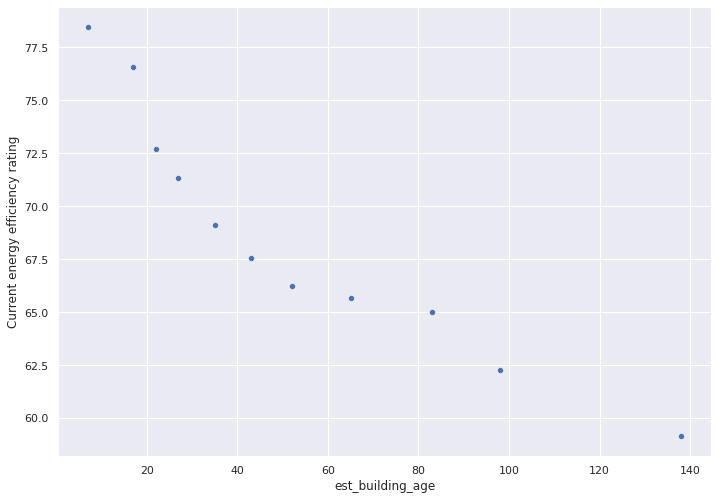

In [78]:
sns.scatterplot(data=age_of_build_start_end, x='est_building_age', y='Current energy efficiency rating')

## Visually, this shows a strong correlation between the energy efficiecny rating and the building's age and hence the Construction Age Band.

Older the building, the lower the energy efficiency rating

<AxesSubplot: xlabel='est_building_age', ylabel='Current Emissions (T.CO2/yr)'>

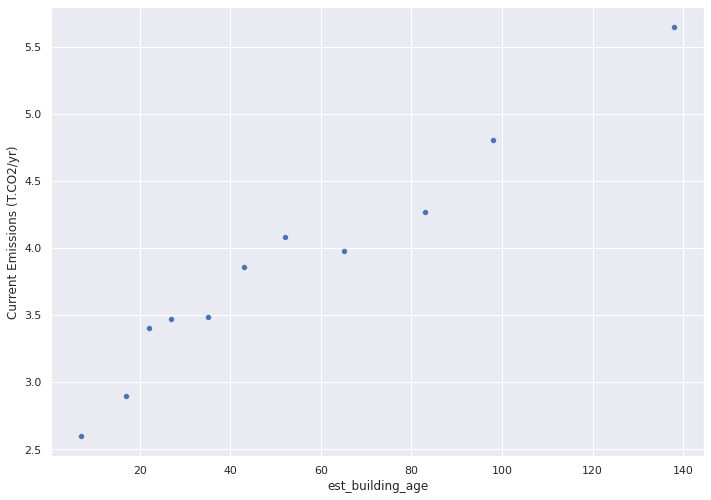

In [79]:
sns.scatterplot(data=age_of_build_start_end, x='est_building_age', y='Current Emissions (T.CO2/yr)')

## Older the building, the higher the emissions of CO2 yearly. 
Being visually strongly negatively correlated with current energy efficiency shows that the data is pretty reliable.

Thus, we can attempt to build an algorithm that predicts the expected energy efficiencies and and CO2 emissions

In [80]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split

In [92]:
target_col = 'Current Emissions (T.CO2/yr)'
dependent_var = 'est_building_age'

In [93]:
# Process main dataset
part3_df = dataset[['Property_UPRN','Postcode','POST_TOWN', 'Part 1 Construction Age Band',target_col]]

In [94]:
part3_df.head()

,Property_UPRN,Postcode,POST_TOWN,Part 1 Construction Age Band,Current Emissions (T.CO2/yr)
0,1.001101e+09,EH4 5EZ,edinburgh,1930-1949,6.2
1,1.001951e+09,EH7 4HE,edinburgh,1919-1929,7.7
2,1.000996e+09,EH4 2DL,edinburgh,1965-1975,4.9
3,1.001257e+09,PH1 1SA,perth,1999-2002,2.9
4,1.235709e+09,G78 1QN,glasgow,before 1919,1.5


In [95]:
part3_df['Part 1 Construction Age Band'] = part3_df['Part 1 Construction Age Band'].str.replace('2008 onwards', '2008-2022')
part3_df['Part 1 Construction Age Band'] = part3_df['Part 1 Construction Age Band'].str.replace('before 1919', '1850-1919')

/tmp/ipykernel_690483/1629447571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part3_df['Part 1 Construction Age Band'] = part3_df['Part 1 Construction Age Band'].str.replace('2008 onwards', '2008-2022')
/tmp/ipykernel_690483/1629447571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part3_df['Part 1 Construction Age Band'] = part3_df['Part 1 Construction Age Band'].str.replace('before 1919', '1850-1919')


In [96]:
start_end_df.head(20)

,0,1,2
0,1919-1929,1919,1929
1,1930-1949,1930,1949
2,1950-1964,1950,1964
3,1965-1975,1965,1975
4,1976-1983,1976,1983
5,1984-1991,1984,1991
6,1992-1998,1992,1998
7,1999-2002,1999,2002
8,2003-2007,2003,2007
9,2008-2022,2008,2022


In [97]:
part3_df = pd.merge(start_end_df, part3_df,left_on=0, right_on='Part 1 Construction Age Band').drop(columns=[0])
part3_df['mid_year'] = part3_df.apply(get_mid_year,axis=1)
part3_df = part3_df.sort_values(by='mid_year', ascending=True).reset_index(drop=True)
part3_df['est_building_age'] = 2022-part3_df['mid_year']

In [98]:
part3_df.head()

,1,2,Property_UPRN,Postcode,POST_TOWN,Part 1 Construction Age Band,Current Emissions (T.CO2/yr),mid_year,est_building_age
0,1850,1919,1.001135e+09,EH4 1QA,edinburgh,1850-1919,5.5,1884,138
1,1850,1919,1.000055e+09,G12 9YD,glasgow,1850-1919,3.3,1884,138
2,1850,1919,1.000062e+09,G42 9RH,glasgow,1850-1919,6.5,1884,138
3,1850,1919,1.000098e+09,ML11 9DU,lanark,1850-1919,3.7,1884,138
4,1850,1919,1.000170e+09,EH21 6ER,musselburgh,1850-1919,3.2,1884,138


In [107]:

x = part3_df[dependent_var].to_numpy().reshape(-1, 1)
y = part3_df[target_col].to_numpy()

In [108]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, shuffle=False)

In [110]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, shuffle=False)

In [111]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate

In [112]:
# Create two models: Quadratic and linear regression
polyreg = make_pipeline(PolynomialFeatures(2), LinearRegression(fit_intercept=False))
linreg = LinearRegression()

In [113]:
scoring = "neg_root_mean_squared_error"
polyscores = cross_validate(polyreg, X_train, y_train, scoring=scoring, return_estimator=True)
linscores = cross_validate(linreg, X_train, y_train, scoring=scoring, return_estimator=True)

In [114]:
# Which one is better? Linear and polynomial
print(linscores["test_score"].mean())
print(polyscores["test_score"].mean())
print(linscores["test_score"].mean() - polyscores["test_score"].mean())

-3.598434801556503
-3.5939137743194225
-0.004521027237080588


In [119]:
x[:50]

array([[138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138],
       [138]])

In [118]:
linscores["estimator"][0].predict(x)[:50]

array([5.58682258, 5.58682258, 5.58682258, 5.58682258, 5.58682258,
       5.58682258, 5.58682258, 5.58682258, 5.58682258, 5.58682258,
       5.58682258, 5.58682258, 5.58682258, 5.58682258, 5.58682258,
       5.58682258, 5.58682258, 5.58682258, 5.58682258, 5.58682258,
       5.58682258, 5.58682258, 5.58682258, 5.58682258, 5.58682258,
       5.58682258, 5.58682258, 5.58682258, 5.58682258, 5.58682258,
       5.58682258, 5.58682258, 5.58682258, 5.58682258, 5.58682258,
       5.58682258, 5.58682258, 5.58682258, 5.58682258, 5.58682258,
       5.58682258, 5.58682258, 5.58682258, 5.58682258, 5.58682258,
       5.58682258, 5.58682258, 5.58682258, 5.58682258, 5.58682258])

In [ ]:
sns.scatterplot(x="")

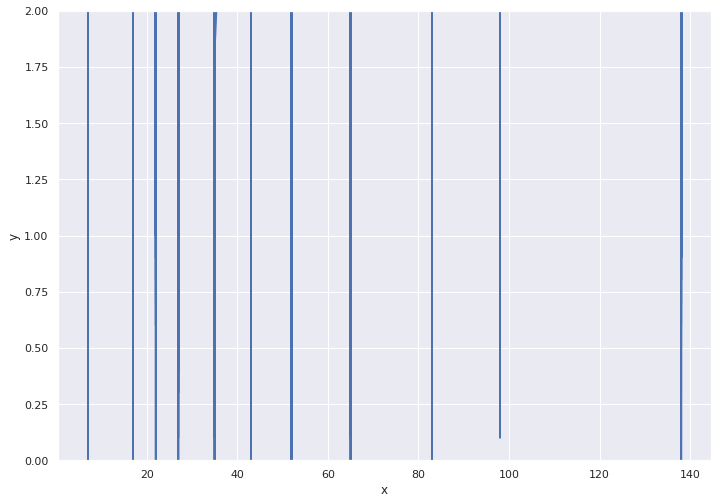

In [117]:
# Plot and compare
plt.plot(x, y)
# plt.plot(x, smooth)
plt.plot(x, polyscores["estimator"][0].predict(x))
plt.plot(x, linscores["estimator"][0].predict(x))
plt.ylim(0,2)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [132]:
print(lm2.coef_)
print(lm2.intercept_)

[0.0280689]
2.4789921547361917


### For energy efficiency, the older the building, energy efficiency (higher the better) declines by 0.167 units. Also, the older the building, the higher the emissions (lower the better), by 0.028 units.

### As expected, the newer the building, the better the energy efficiency; the newer the building, emissions are lower.

## Algorithm Challenge 4 Build an algorithm that takes as input the characteristics of a building (any field of the dataset) and outputs recommendations on the elements of the house to be modified to improve its energy performance - (15 points)

Code from the LDA process (same as 1 and 2) comes from: https://towardsdatascience.com/how-to-easily-cluster-textual-data-in-python-ab27040b07d8

The approach to this would be to instead, look at the best performers in terms of emissions and energy efficiency, and use the wall and roof descriptions to look at what good energy performers will look like. 

The LDA approach will be used again to shorten the descriptions.

In [133]:
dataset.dtypes

Property_UPRN                                          float64
Postcode                                                object
POST_TOWN                                               object
Date of Assessment                                      object
Primary Energy Indicator (kWh/m²/year)                 float64
Total floor area (m²)                                  float64
Current energy efficiency rating                       float64
Current energy efficiency rating band                   object
Potential Energy Efficiency Rating                     float64
Potential energy efficiency rating band                 object
Current Environmental Impact Rating                    float64
Current Environmental Impact Rating Band                object
Potential Environmental Impact Rating                  float64
Potential Environmental Impact Rating Band              object
CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr)    float64
WALL_DESCRIPTION                                       

In [134]:
emissions = dataset.sort_values(by="Current Emissions (T.CO2/yr)").reset_index(drop=True)

In [135]:
emissions.head(20)

,Property_UPRN,Postcode,POST_TOWN,Date of Assessment,Primary Energy Indicator (kWh/m²/year),Total floor area (m²),Current energy efficiency rating,Current energy efficiency rating band,Potential Energy Efficiency Rating,Potential energy efficiency rating band,...,Built Form,Property Type,heat_savings,hot_water_save,AGG_RATING,EE_PRODUCT,ROOF_RATING,ROOF_EE_PRODUCT,est_build_year,build_age
0,1.235876e+09,PA21 2DB,tighnabruaich,28/10/2021,-858.0,143.0,268.0,A,291.0,A,...,Detached,House,0.0,159.0,5.000000,-795.0,4.0,-636.0,0,2022
1,1.235429e+09,KY2 6FN,kirkcaldy,11/06/2021,-145.0,346.0,141.0,A,141.0,A,...,Detached,Bungalow,0.0,0.0,5.000000,-125.0,4.0,-100.0,0,2022
2,1.235052e+09,EH23 4PS,gorebridge,06/04/2021,-60.0,215.0,124.0,A,134.0,A,...,Detached,Bungalow,0.0,0.0,5.000000,-135.0,4.0,-108.0,0,2022
3,1.235755e+09,EH23 4NN,gorebridge,08/04/2021,-60.0,215.0,124.0,A,134.0,A,...,Detached,Bungalow,0.0,0.0,5.000000,-135.0,4.0,-108.0,0,2022
4,1.001273e+09,KA16 9LJ,newmilns,29/07/2021,140.0,199.0,78.0,C,87.0,B,...,Detached,House,990.0,300.0,3.000000,-54.0,4.5,-81.0,1919,103
5,1.235743e+09,G71 7FR,glasgow,23/03/2021,-263.0,75.0,143.0,A,144.0,A,...,Semi-Detached,House,0.0,78.0,5.000000,-219.5,4.0,-175.6,0,2022
6,1.235888e+09,PH36 4HY,acharacle,18/11/2021,-125.0,146.0,126.0,A,127.0,A,...,Detached,House,0.0,267.0,5.000000,-105.0,4.0,-84.0,0,2022
7,1.234627e+09,TD11 3NG,duns,09/11/2021,88.0,226.0,90.0,B,102.0,A,...,Detached,House,-27.0,294.0,4.500000,-58.5,3.0,-39.0,1919,103
8,1.235783e+09,G83 8SD,gartocharn,26/05/2021,-61.0,292.0,115.0,A,118.0,A,...,Detached,House,0.0,0.0,5.000000,-51.5,4.0,-41.2,0,2022
9,1.235014e+09,ML8 5NE,carluke,23/08/2021,-53.0,301.0,116.0,A,117.0,A,...,Detached,House,-3.0,285.0,5.000000,-45.5,4.0,-36.4,0,2022


In [136]:
#Looking at the smallest emitters in CO2

emissions_1000 = emissions[:1000]

In [137]:
wall_ee_1000 = emissions_1000.groupby(['WALL_DESCRIPTION'])['Current energy efficiency rating'].mean().reset_index(name="EE_WALL")
wall_ee_1000

,WALL_DESCRIPTION,EE_WALL
0,Average thermal transmittance 0.09 W/m²K,105.000000
1,Average thermal transmittance 0.11 W/m²K,97.000000
2,Average thermal transmittance 0.12 W/m²K,100.000000
3,Average thermal transmittance 0.13 W/m²K,92.777778
4,Average thermal transmittance 0.13 W/m²K,86.000000
...,...,...
81,"Timber frame, as built, insulated (assumed)",86.870968
82,"Timber frame, as built, insulated (assumed) | ...",66.000000
83,"Timber frame, as built, insulated (assumed) | ...",101.000000
84,"Timber frame, as built, partial insulation (as...",72.000000


In [138]:
#applying LDA to the wall description

em_1000_wall_ee = wall_ee_1000['WALL_DESCRIPTION']
count_vect = CountVectorizer(stop_words=stopwords.words('english'), lowercase=True)
em_1000_wall_ee_vec = count_vect.fit_transform(em_1000_wall_ee)
em_1000_wall_ee_vec.todense()

matrix([[1, 0, 0, ..., 1, 0, 0],
        [0, 1, 0, ..., 1, 0, 0],
        [0, 0, 1, ..., 1, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [139]:
count_vect.get_feature_names()

['09',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '25',
 'additional',
 'assumed',
 'average',
 'brick',
 'built',
 'cavity',
 'external',
 'filled',
 'frame',
 'granite',
 'insulated',
 'insulation',
 'internal',
 'limestone',
 'm²k',
 'mâ²k',
 'partial',
 'sandstone',
 'solid',
 'system',
 'thermal',
 'timber',
 'transmittance',
 'wall',
 'whinstone']

In [140]:
em_1000_wall_ee_tfidf = tfidf_transformer.fit_transform(em_1000_wall_ee_vec)

In [141]:
dimension = 5
em_1000_wall_ee_lda = LDA(n_components = dimension)
em_1000_wall_ee_lda_array = em_1000_wall_ee_lda.fit_transform(em_1000_wall_ee_tfidf)


In [142]:
em_1000_wall_ee_components = [em_1000_wall_ee_lda.components_[i] for i in range(len(em_1000_wall_ee_lda.components_))]
features = count_vect.get_feature_names()
em_1000_wall_ee_important_words = [sorted(features, key = lambda x: em_1000_wall_ee_components[j][features.index(x)], reverse = True)[:3] for j in range(len(em_1000_wall_ee_components))]
em_1000_wall_ee_important_words

[['cavity', 'wall', 'filled'],
 ['timber', 'frame', 'insulated'],
 ['built', 'insulation', 'sandstone'],
 ['average', 'thermal', 'transmittance'],
 ['m²k', 'average', 'thermal']]

In [143]:
em_1000_wall_list = []

for i in range(len(em_1000_wall_ee_lda_array)):
    list_array = list(em_1000_wall_ee_lda_array[i])
    max_num = list_array.index(max(list_array))
    em_1000_wall_list.append(max_num)
    
print(len(em_1000_wall_list))

86


In [144]:
wall_ee_1000['desc_num'] = em_1000_wall_list

In [145]:
agg_em1000_wall_ee_short_desc = []

for i in range(len(wall_ee_1000)):
    number = wall_ee_1000['desc_num'][i]
    description = em_1000_wall_ee_important_words[number]
    agg_em1000_wall_ee_short_desc.append(description)
    
print(len(agg_em1000_wall_ee_short_desc))

86


In [146]:
wall_ee_1000['short_desc']= agg_em1000_wall_ee_short_desc

In [147]:
wall_ee_1000

,WALL_DESCRIPTION,EE_WALL,desc_num,short_desc
0,Average thermal transmittance 0.09 W/m²K,105.000000,3,"[average, thermal, transmittance]"
1,Average thermal transmittance 0.11 W/m²K,97.000000,3,"[average, thermal, transmittance]"
2,Average thermal transmittance 0.12 W/m²K,100.000000,3,"[average, thermal, transmittance]"
3,Average thermal transmittance 0.13 W/m²K,92.777778,3,"[average, thermal, transmittance]"
4,Average thermal transmittance 0.13 W/m²K,86.000000,3,"[average, thermal, transmittance]"
...,...,...,...,...
81,"Timber frame, as built, insulated (assumed)",86.870968,1,"[timber, frame, insulated]"
82,"Timber frame, as built, insulated (assumed) | ...",66.000000,1,"[timber, frame, insulated]"
83,"Timber frame, as built, insulated (assumed) | ...",101.000000,1,"[timber, frame, insulated]"
84,"Timber frame, as built, partial insulation (as...",72.000000,1,"[timber, frame, insulated]"


### (4) - part 1: 

For walls, it looks like regardless of the material used as the walls, as long as there is internal insulation, the building energy performance will be good. Buildings with low average thermal transmittance below 0.3 watt per sq meter Kelvin also have good energy performance.

In [148]:
#create function that creates LDA and important words/topic models, given corpus and number of topics, and number of words for each topic

def top_model_gen(corpus, num_topics, num_words):
    count_vect = CountVectorizer(stop_words=stopwords.words('english'),lowercase=True)
    x_counts = count_vect.fit_transform(corpus)
    x_counts.todense()
    
    tfidf_transformer = TfidfTransformer()
    x_tfidf = tfidf_transformer.fit_transform(x_counts)
    
    lda = LDA(n_components = num_topics)
    lda_array = lda.fit_transform(x_tfidf)
    
    components = [lda.components_[i] for i in range(len(lda.components_))]
    features = count_vect.get_feature_names()
    important_words = [sorted(features, key = lambda x: components[j][features.index(x)], reverse=True)[:num_words] for j in range(len(components))]
    
    return lda_array, important_words 


In [149]:
#we can do something similar with the roof

roof_ee_1000 = emissions_1000.groupby(['ROOF_DESCRIPTION'])['Current energy efficiency rating'].mean().reset_index(name="EE_WALL")
roof_ee_1000

,ROOF_DESCRIPTION,EE_WALL
0,(another dwelling above),80.604520
1,(another dwelling above),81.062500
2,(other premises above),86.478814
3,(other premises above),85.226415
4,Average thermal transmittance 0.06 W/m²K,84.000000
...,...,...
74,"Roof room(s), ceiling insulated",79.000000
75,"Roof room(s), ceiling insulated",100.000000
76,"Roof room(s), insulated",78.000000
77,"Roof room(s), insulated",78.000000


In [150]:
em_1000_roof = top_model_gen(roof_ee_1000['ROOF_DESCRIPTION'],10,4)

In [151]:
em_1000_roof_array = em_1000_roof[0]

In [152]:
em_1000_roof_array

array([[0.04142136, 0.04142136, 0.04142136, 0.04142136, 0.04142136,
        0.04142136, 0.04142136, 0.04142136, 0.04142136, 0.62720779],
       [0.04142136, 0.04142136, 0.04142136, 0.04142136, 0.04142136,
        0.04142136, 0.04142136, 0.04142136, 0.04142136, 0.62720779],
       [0.05      , 0.05      , 0.55      , 0.05      , 0.05      ,
        0.05      , 0.05      , 0.05      , 0.05      , 0.05      ],
       [0.05      , 0.05      , 0.55      , 0.05      , 0.05      ,
        0.05      , 0.05      , 0.05      , 0.05      , 0.05      ],
       [0.0319562 , 0.03195621, 0.03195621, 0.25524938, 0.03195621,
        0.0319562 , 0.03195621, 0.48910095, 0.03195622, 0.03195621],
       [0.0319562 , 0.0319562 , 0.0319562 , 0.0319562 , 0.0319562 ,
        0.0319562 , 0.0319562 , 0.48905277, 0.2552976 , 0.0319562 ],
       [0.03166673, 0.03166673, 0.03166673, 0.2425279 , 0.03166673,
        0.03166673, 0.03166673, 0.50413828, 0.03166673, 0.03166673],
       [0.03166673, 0.03166673, 0.0316667

In [153]:
em_1000_roof_words = em_1000_roof[1]

In [154]:
em_1000_roof_words

[['insulation', 'mm', 'loft', 'pitched'],
 ['250', 'loft', 'mm', 'insulation'],
 ['flat', 'premises', 'insulated', 'assumed'],
 ['roof', 'room', 'insulated', 'assumed'],
 ['ceiling', 'roof', 'room', 'insulated'],
 ['pitched', 'insulated', '400', 'assumed'],
 ['200', 'insulation', 'pitched', 'mm'],
 ['average', 'thermal', 'transmittance', 'm²k'],
 ['08', 'm²k', 'average', 'thermal'],
 ['limited', 'another', 'dwelling', 'flat']]

In [155]:
#creating a function that returns the topic number from the LDA array
def topic_num_column(dataframe, array):
    description_no = []
    for i in range(len(dataframe)):
        list_array = list(array[i])
        max_num = list_array.index(max(list_array))
        description_no.append(max_num)
    return description_no
   

In [156]:
#creating a function that returns the topic model from the topic number
def short_desc_column(topic_num_list, words):
    short_desc = []
    for i in range(len(topic_num_list)):
        description = words[topic_num_list[i]]
        short_desc.append(description)
    return short_desc
        

In [157]:
roof_topic = topic_num_column(roof_ee_1000, em_1000_roof_array)
roof_topic

[9,
 9,
 2,
 2,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 2,
 2,
 0,
 0,
 5,
 2,
 0,
 9,
 9,
 0,
 0,
 0,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 1,
 1,
 0,
 5,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 5,
 9,
 5,
 3,
 3,
 3,
 3,
 3]

In [158]:
len(roof_topic)

79

In [159]:
roof_words = short_desc_column(roof_topic, em_1000_roof_words)
roof_words

[['limited', 'another', 'dwelling', 'flat'],
 ['limited', 'another', 'dwelling', 'flat'],
 ['flat', 'premises', 'insulated', 'assumed'],
 ['flat', 'premises', 'insulated', 'assumed'],
 ['average', 'thermal', 'transmittance', 'm²k'],
 ['average', 'thermal', 'transmittance', 'm²k'],
 ['average', 'thermal', 'transmittance', 'm²k'],
 ['average', 'thermal', 'transmittance', 'm²k'],
 ['average', 'thermal', 'transmittance', 'm²k'],
 ['average', 'thermal', 'transmittance', 'm²k'],
 ['average', 'thermal', 'transmittance', 'm²k'],
 ['average', 'thermal', 'transmittance', 'm²k'],
 ['average', 'thermal', 'transmittance', 'm²k'],
 ['average', 'thermal', 'transmittance', 'm²k'],
 ['average', 'thermal', 'transmittance', 'm²k'],
 ['average', 'thermal', 'transmittance', 'm²k'],
 ['average', 'thermal', 'transmittance', 'm²k'],
 ['average', 'thermal', 'transmittance', 'm²k'],
 ['average', 'thermal', 'transmittance', 'm²k'],
 ['average', 'thermal', 'transmittance', 'm²k'],
 ['average', 'thermal', 'transmi

In [160]:
len(roof_words)

79

In [161]:
roof_ee_1000['topic_number']= roof_topic
roof_ee_1000['short_description'] = roof_words
roof_ee_1000.head(10)

,ROOF_DESCRIPTION,EE_WALL,topic_number,short_description
0,(another dwelling above),80.604520,9,"[limited, another, dwelling, flat]"
1,(another dwelling above),81.062500,9,"[limited, another, dwelling, flat]"
2,(other premises above),86.478814,2,"[flat, premises, insulated, assumed]"
3,(other premises above),85.226415,2,"[flat, premises, insulated, assumed]"
4,Average thermal transmittance 0.06 W/m²K,84.000000,7,"[average, thermal, transmittance, m²k]"
5,Average thermal transmittance 0.08 W/m²K,86.000000,7,"[average, thermal, transmittance, m²k]"
6,Average thermal transmittance 0.09 W/m²K,86.521277,7,"[average, thermal, transmittance, m²k]"
7,Average thermal transmittance 0.09 W/m²K,84.285714,7,"[average, thermal, transmittance, m²k]"
8,Average thermal transmittance 0.1 W/m²K,96.681818,7,"[average, thermal, transmittance, m²k]"
9,Average thermal transmittance 0.10 W/m²K,90.030303,7,"[average, thermal, transmittance, m²k]"


In [162]:
roof_ee_1000 = roof_ee_1000.sort_values(by='EE_WALL').reset_index(drop=True)
roof_ee_1000

,ROOF_DESCRIPTION,EE_WALL,topic_number,short_description
0,"Pitched, insulated (assumed) | Pitched, no ins...",11.000000,3,"[roof, room, insulated, assumed]"
1,"Pitched, 200 mm loft insulation | Pitched, no ...",39.000000,6,"[200, insulation, pitched, mm]"
2,"Pitched, no insulation (assumed)",56.000000,5,"[pitched, insulated, 400, assumed]"
3,"Flat, limited insulation (assumed)",59.000000,9,"[limited, another, dwelling, flat]"
4,"Pitched, 300 mm loft insulation | Pitched, ins...",59.000000,0,"[insulation, mm, loft, pitched]"
...,...,...,...,...
74,Average thermal transmittance 0.12 W/m²K,102.823529,7,"[average, thermal, transmittance, m²k]"
75,Average thermal transmittance 0.15 W/m²K,104.375000,7,"[average, thermal, transmittance, m²k]"
76,"Pitched, 400+ mm loft insulation",104.600000,5,"[pitched, insulated, 400, assumed]"
77,Average thermal transmittance 0.11 W/m²K,105.500000,7,"[average, thermal, transmittance, m²k]"


### For (4) - part 2: 

It looks like if there is insulation, pitched with loft insulation of more than 200mm, and if the average thermal transmittance is low, then the building is expected to have good energy performance. These qualities ought to be recommended for any building where possible.

## Algorithm Challenge 5: Build an algorithm that takes as input the characteristics of a building (any field of the dataset except those related to costs) and outputs the total cost of energy of the building over a 3-year period - (15 points)

In [163]:
dataset.columns

Index(['Property_UPRN', 'Postcode', 'POST_TOWN', 'Date of Assessment',
       'Primary Energy Indicator (kWh/m²/year)', 'Total floor area (m²)',
       'Current energy efficiency rating',
       'Current energy efficiency rating band',
       'Potential Energy Efficiency Rating',
       'Potential energy efficiency rating band',
       'Current Environmental Impact Rating',
       'Current Environmental Impact Rating Band',
       'Potential Environmental Impact Rating',
       'Potential Environmental Impact Rating Band',
       'CO2 Emissions Current Per Floor Area (kg.CO2/m²/yr)',
       'WALL_DESCRIPTION', 'WALL_ENERGY_EFF', 'ROOF_DESCRIPTION',
       'ROOF_ENERGY_EFF', 'FLOOR_DESCRIPTION', 'FLOOR_ENERGY_EFF',
       'FLOOR_ENV_EFF', 'WINDOWS_DESCRIPTION', 'WINDOWS_ENERGY_EFF',
       'WINDOWS_ENV_EFF', 'MAINHEAT_DESCRIPTION', 'MAINHEAT_ENERGY_EFF',
       'MAINHEAT_ENV_EFF', 'MAINHEATCONT_DESCRIPTION', 'MAINHEATC_ENERGY_EFF',
       'MAINHEATC_ENV_EFF', 'HOT_WATER_ENERGY_EFF', 'HO

5. The column to focus on would be "Total current energy costs over 3 years (£)". That would be the dependent variable. The independent variable could be 'Current energy efficiency rating'. The proposal here is to create a linear regression model.  

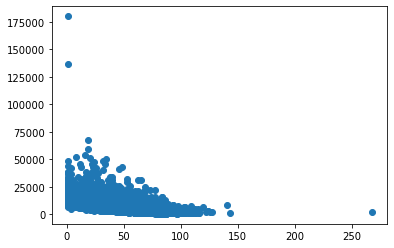

In [164]:
plt.scatter(dataset['Current energy efficiency rating'],  dataset['Total current energy costs over 3 years (£)'])
plt.show()

In [165]:
model_x = dataset['Current energy efficiency rating']
model_y = dataset['Total current energy costs over 3 years (£)']

In [166]:
model_x = np.array(model_x)
model_y = np.array(model_y)

model_x = model_x.reshape(-1,1)
model_y = model_y.reshape(-1,1)

In [167]:
model_eff_costs = LinearRegression().fit(model_x, model_y)

In [168]:
model_eff_costs.coef_

array([[-108.03900306]])

In [169]:
model_eff_costs.intercept_

array([10166.4758954])

Generally speaking, the lower the efficiency score, the lower the total energy costs over 3 years. Every improvement in energy efficiency saves 108 pounds in energy costs over 3 years.

## Algorithm Challenge 6: Build an algorithm that takes as input the characteristics of a building (any field in the dataset) and outputs recommendations on which elements of the house should be modified to most effectively decrease the total energy cost of the building over a 3-year period

We have shown how the walls and roofs of the buildings could be improved to improve their energy performance in previous sections - see response to algorithm challenges 1, 2, and 4. Using aggregations and LDA, we show that insulation of walls and roofs regardless of wall materials can boost energy efficiency and lower energy costs over 3 years, as shown in algorithm challenge 5. 

An appropriate algorithm would build on the results of 1, 2, and 4 to provide guidance on how to boost energy performance as defined by energy efficiency. 

Adding insulation appears to be the key to improving energy performance as defined by energy efficiency. 